In [38]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [40]:
ph_data = "6.10 6.74 6.22 5.65 6.38 6.70 7.00 6.43 7.00 6.70 6.70 5.94 6.28 \
6.34 6.62 6.55 2.92 6.10 6.20 6.70 7.00 6.85 6.31 6.26 6.36 6.28 \
6.38 6.70 6.62 7.00 6.45 6.31 2.86 6.31 6.09 6.17 6.64 6.45 \
7.00 6.18 6.58 5.38 6.34 7.00 5.70 6.65 6.56 6.00 6.70 6.45"

In [4]:
data = [float(i) for i in ph_data.split()]

In [5]:
min_data = min(data)
max_data = max(data)
median_data = round(np.median(data),3)
percentile_25_data = round(np.percentile(data, 25),3)
percentile_75_data = round(np.percentile(data, 75),3)

In [7]:
print("Min: " + str(min_data))
print("Max: " + str(max_data))
print("Median: " + str(median_data))
print("25th Percentile: " + str(percentile_25_data))
print("75th Percentile: " + str(percentile_75_data))

Min: 2.86
Max: 7.0
Median: 6.405
25th Percentile: 6.205
75th Percentile: 6.7


In [8]:
mean_data = round(np.mean(data),3)
mean_data

6.297

In [10]:
from scipy import stats
data_trimmed_mean = stats.trim_mean(data,0.1)
print("Sample mean: " + str(mean_data))
print("Trimmed mean: " + str(data_trimmed_mean))

Sample mean: 6.297
Trimmed mean: 6.4335


In [37]:
import math
print("75th Percentile: " + str(percentile_75_data))
print("25th Percentile: " + str(percentile_25_data))
print("IQR = 75th percentile - 25th percent")
IQR = round(percentile_75_data - percentile_25_data, 3)
print("IQR: " + str(IQR))
sample_size = len(data)
a = (1/(sample_size-1))*sum([(i-mean_data)**2 for i in data])
sample_std = round(math.sqrt(a),3)
print("Sample standard Deviation: " + str(sample_std))

75th Percentile: 6.7
25th Percentile: 6.205
IQR = 75th percentile - 25th percent
IQR: 0.495
Sample standard Deviation: 0.788


In [12]:
data_iql_rule = [i for i in data if i < (mean_data + 1.5*IQR) and (i > mean_data - 1.5*IQR)]
data_to_plot= [data, data_iql_rule]

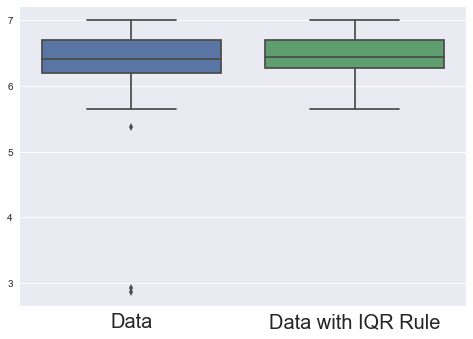

In [21]:
ax = sns.boxplot(data = data_to_plot)
ax.set_xticklabels(["Data", "Data with IQR Rule"], fontsize=20)

(2.5, 7.25)

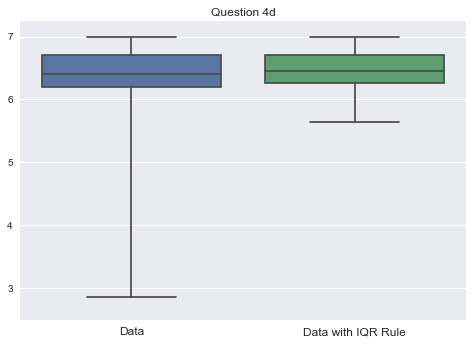

In [34]:
ax = sns.boxplot(data = data_to_plot, whis=100)
ax.set_title("Question 4d")
ax.set_xticklabels(["Data", "Data with IQR Rule"], fontsize=12)
sns.plt.ylim(2.5, 7.25)

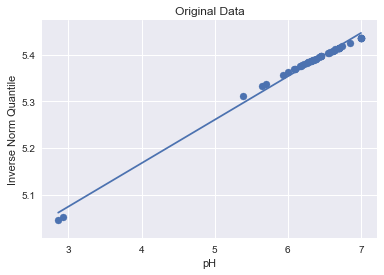

In [65]:
quantile1 = [(mean_data + sample_std * norm.ppf(i/(sample_size+1))) for i in data]
plt.scatter(data, quantile1)
plt.plot(np.unique(data), np.poly1d(np.polyfit(data, quantile1, 1))(np.unique(data)))
plt.xlabel("pH")
plt.ylabel("Inverse Norm Quantile")
plt.title("Original Data")
plt.show()

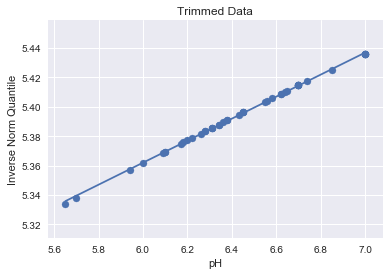

In [66]:
quantile2 = [(mean_data + sample_std * norm.ppf(i/(sample_size+1))) for i in data_iql_rule]
plt.scatter(data_iql_rule, quantile2)
plt.plot(np.unique(data_iql_rule), np.poly1d(np.polyfit(data_iql_rule, quantile2, 1))(np.unique(data_iql_rule)))
plt.xlabel("pH")
plt.ylabel("Inverse Norm Quantile")
plt.title("Trimmed Data")
plt.show()